In [48]:
#loading dependencies
import pandas as pd


Load data

In [49]:
#load the data
data = pd.read_csv('ai4i2020.csv')
#make data into dataframe
df = pd.DataFrame(data)
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [50]:
#check for missing values
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [51]:
#drop irrelevant columns
df = df.drop(['UDI', 'Product ID','Type','TWF','HDF','PWF','OSF','RNF'], axis=1)
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0


In [52]:
#train the neural network
#importing the necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(512, activation='relu', input_dim=5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
model.summary()

c:\Users\Emil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,241 (1.02 MB)

 Trainable params: 266,241 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
x=df.drop('Machine failure', axis=1)
y=df['Machine failure']

hist = model.fit(x, y, validation_split=0.2, epochs=100, batch_size=100)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 61.2677 - mae: 61.2677 - val_loss: 22.2421 - val_mae: 22.2421
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.6801 - mae: 18.6801 - val_loss: 2.1567 - val_mae: 2.1567
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.2571 - mae: 10.2571 - val_loss: 5.8877 - val_mae: 5.8877
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.6356 - mae: 7.6356 - val_loss: 3.7718 - val_mae: 3.7718
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.1158 - mae: 6.1158 - val_loss: 8.7871 - val_mae: 8.7871
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.3941 - mae: 8.3941 - val_loss: 6.9638 - val_mae: 6.9638
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.8742 - mae: 5.8742 - val_loss: 1.9203 - val_mae: 1.9203
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4981 - mae: 2.4981 - val_loss: 4.5367 - val_mae: 4.5367
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - los

[]

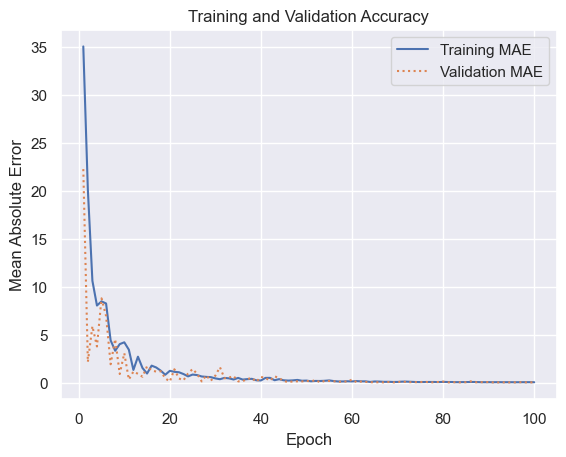

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

err = hist.history['mae']
val_err = hist.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()